# Which Kepler/K2 planets are useful for atmospheric followup?

### Assumptions

* Assume all planets have atmospheres (this is likely true for most planets)
* Assume no planets have clouds or hazes (this is unlikely)
* Assume a circular orbit (this is largely true)
* Assume HST WFC3 for followup instrument (this is reasonable)
* Assume 1 second exposure time with a scan rate of 0.15s (this could be improved for each target)
* Assume HST WFC3 has no saturation limit. (This could be acheived with scanning)
* Assume one observation is taken (this is an underestimate)
* Assume 50 pixels of the detector are illuminated for the scan (this is reasonable)
* Assume 5 scale heights of atmsophere (this is an approximation)
* Assume atmosphere is purely hyrdogen (this is likely to be wrong for most small planets)
* Assume atmosphere is entirely opaque in the WFC3 bandpass (this is an overestimate)
* Assume starspot free (this is unlikely)
* Where masses are unknown, assume mass-radius relation from Weiss 2014 (this is an approximation)
* Assume 2MASS photometry is correct (this is reasonable)
* Assume planets have no reflection, all light us absorbed

All told, this will provide an overestimate of the signal or the 'best case' scenario.

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.constants import G, m_p, k_B
%matplotlib inline
plt.style.use('ggplot')

Define small planets as 3 earth radii

In [347]:
planets = pd.read_csv(NEXSCI_API + '?table=planets&select=pl_hostname,pl_letter,pl_disc,ra,dec,pl_trandep,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranflag,pl_k2flag,pl_kepflag,pl_facility,st_rad,st_teff,st_optmag,st_j,st_h', comment='#')
composite = pd.read_csv(NEXSCI_API + '?table=compositepars&select=fpl_hostname,fpl_letter,fpl_smax,fpl_radj,fpl_bmassj,fpl_bmassjerr1,fpl_bmassjerr2,fpl_eqt,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,', comment='#')
composite.columns = ['pl_hostname','pl_letter','pl_orbsmax','pl_radj','pl_bmassj','pl_bmassjerr1','pl_bmassjerr2','pl_eqt','pl_orbper','pl_orbpererr1','pl_orbpererr2']

In [348]:
df = pd.merge(left=planets, right=composite, how='left', left_on=['pl_hostname', 'pl_letter'], 
         right_on = ['pl_hostname', 'pl_letter'])
df

,pl_hostname,pl_letter,pl_disc,ra,dec,pl_trandep,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranflag,...,st_h,pl_orbsmax,pl_radj,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_eqt,pl_orbper,pl_orbpererr1,pl_orbpererr2
0,Kepler-867,b,2016,287.285313,51.249981,NaN,2.454971e+06,0.003110,-0.003110,1,...,13.185,NaN,0.414,0.06120,NaN,NaN,NaN,150.242127,6.047000e-04,-6.047000e-04
1,Kepler-868,b,2016,282.363512,46.675240,NaN,2.454970e+06,0.003460,-0.003460,1,...,14.128,NaN,0.183,0.01530,NaN,NaN,NaN,5.032518,2.082000e-05,-2.082000e-05
2,Kepler-870,b,2016,295.402544,50.478634,NaN,2.454968e+06,0.004340,-0.004340,1,...,13.707,NaN,0.248,0.02560,NaN,NaN,NaN,21.358762,1.184000e-04,-1.184000e-04
3,Kepler-871,b,2016,294.527110,43.368160,NaN,2.454969e+06,0.004420,-0.004420,1,...,14.170,NaN,0.334,0.04240,NaN,NaN,NaN,22.045902,1.072000e-04,-1.072000e-04
4,Kepler-872,b,2016,295.417461,43.605640,NaN,2.454966e+06,0.001590,-0.001590,1,...,13.462,NaN,0.178,0.01450,NaN,NaN,NaN,2.578855,5.170000e-06,-5.170000e-06
5,Kepler-873,b,2016,296.403212,51.271339,NaN,2.454973e+06,0.002880,-0.002880,1,...,13.474,NaN,0.335,0.04260,NaN,NaN,NaN,20.553384,7.327000e-05,-7.327000e-05
6,Kepler-875,b,2016,297.301300,43.141888,NaN,2.454985e+06,0.003970,-0.003970,1,...,13.601,NaN,0.259,0.02750,NaN,NaN,NaN,27.507380,1.536000e-04,-1.536000e-04
7,Kepler-876,b,2016,283.478199,43.383781,NaN,2.454967e+06,0.003620,-0.003620,1,...,13.437,NaN,0.128,0.00829,NaN,NaN,NaN,5.144380,2.466000e-05,-2.466000e-05
8,Kepler-877,b,2016,289.859129,46.522667,NaN,2.454971e+06,0.002230,-0.002230,1,...,12.736,NaN,0.189,0.01620,NaN,NaN,NaN,18.458471,4.779000e-05,-4.779000e-05
9,Kepler-878,b,2016,285.296197,46.603439,NaN,2.454989e+06,0.002970,-0.002970,1,...,12.907,NaN,0.172,0.01380,NaN,NaN,NaN,25.942203,1.029000e-04,-1.029000e-04


In [349]:
planets.join(composite, on=['pl_hostname', 'pl_letter'])

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [ ]:
small = 3*u.earthRad

Get the planet catalog from nexsci

In [ ]:
import logging

In [ ]:
logging.getLogger()

In [ ]:
NEXSCI_API = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI'
df = pd.read_csv(NEXSCI_API + '?table=planets&select=pl_hostname,pl_letter,pl_disc,ra,dec,pl_trandep,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranflag,pl_orbsmax,pl_radj,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_eqt,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_k2flag,pl_kepflag,pl_facility,st_rad,st_teff,st_optmag,st_j,st_h', comment='#')
df.to_csv('planets.csv')

In [ ]:
# Add in any random unpublished planets...

df.loc[len(df),['pl_hostname', 'pl_letter', 'ra', 'dec', 'pl_trandep', 'pl_tranmid', 'st_teff', 'st_rad', 'st_j','st_optmag', 'st_h', 'pl_orbper', 'pl_radj','pl_tranflag','pl_orbsmax','pl_facility','pl_k2flag']] = ['Wolf 503', 'b', '206.8476824570807','-06.1368692373421',0.00072158, 2458179.372678949, 4716, 0.69, 8.324, 10.28, 7.774, 6.0013, 0.1811, 1,0.056833, 'K2',1]

Only use the transiting planets, calculate the equillibrium temperature and transit depth as these can be nans in nexsci for some reason. 

In [ ]:
#We should only do this when there are nan values
df = df[df.pl_tranflag==1].reset_index(drop=True)

nan = ~np.isfinite(df.pl_eqt)
sep = np.asarray(df.pl_orbsmax)*u.AU
rstar = (np.asarray(df.st_rad)*u.solRad).to(u.AU)
temp = np.asarray(df.st_teff)*u.K
df.loc[nan, ['pl_eqt']] = (temp[nan]*np.sqrt(rstar[nan]/(2*sep[nan])))

nan = ~np.isfinite(df.pl_trandep)
df.loc[nan,['pl_trandep']] = ((np.asarray(df.pl_radj[nan])*u.jupiterRad).to(u.solRad)/(np.asarray(df.st_rad[nan])*u.solRad))**2

Use the mass/radius relation from Weiss 2014 for planets 1.5-4 earth radii to fill in any blank masses and ones with large errors

In [350]:
nan = ~np.isfinite(df.pl_bmassj)
higherrs = df.pl_bmassjerr1/df.pl_bmassj > 0.1
low = (np.asarray(df.pl_radj)*u.jupiterRad).to(u.earthRad)  > 1.5*u.earthRad
high = (np.asarray(df.pl_radj)*u.jupiterRad).to(u.earthRad)  < 4.*u.earthRad
recalculate = np.all([low,high, np.any([nan, higherrs], axis=0)], axis=0)

rade = (np.asarray(df.loc[recalculate,'pl_radj'])*u.jupiterRad).to(u.earthRad).value
df.loc[recalculate, 'pl_bmassj'] = (((2.69* rade)**0.93)*u.earthMass).to(u.jupiterMass).value

/Users/ch/miniconda3/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ch/miniconda3/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Assume a fully hydrogen atmosphere that has 5 scale heights and is completely opaque in the WFC3 bandpass

In [351]:
mu = 2
g = G * (np.asarray(df.pl_bmassj)*u.jupiterMass)/(np.asarray(df.pl_radj)*u.jupiterRad)**2
g = g.to(u.m/u.second**2)
H = ((k_B*np.asarray(df.pl_eqt)*u.K)/(mu * m_p*g)).to(u.km)

Change in transit depth due to atmosphere

In [352]:
delta = ((H*5) + ((np.asarray(df.pl_radj)*u.jupiterRad).to(u.km)))**2/((np.asarray(df.st_rad)*u.solRad).to(u.km))**2
delta = delta.value - (((np.asarray(df.pl_radj)*u.jupiterRad).to(u.km))**2/((np.asarray(df.st_rad)*u.solRad).to(u.km))**2)
df['delta'] = delta

In [353]:
#One second scan and a 50 pixel spectrum
exptime = 1
scansize = 50

star_fl = (5.5/0.15)*10.**(-0.4*(df.st_h-15))
#star_fl[star_fl>33000] = 33000
fl = df.delta*star_fl
fl *= scansize * exptime

df['snr'] = fl**0.5

k2 = df[(df.pl_k2flag==1)&(df.pl_facility=='K2')].reset_index(drop=True)
kepler = df[(df.pl_kepflag==1)&(df.pl_facility=='Kepler')].reset_index(drop=True)

/Users/ch/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


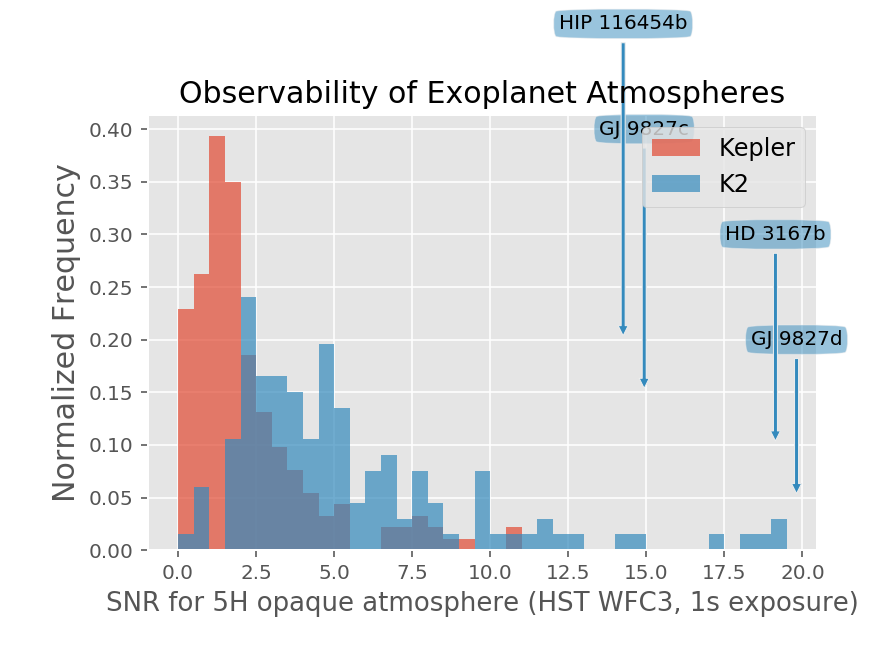

In [360]:
fig, ax = plt.subplots()
fl = kepler.snr
h=plt.hist((fl[np.isfinite(fl)]), np.arange(0,20,0.5), normed=True, alpha=0.7, label='Kepler')

fl = k2.snr
plt.hist((fl[np.isfinite(fl)]), h[1], normed=True, alpha=0.7, label='K2')

plt.xlabel('SNR for 5H opaque atmosphere (HST WFC3, 1s exposure)', fontsize=13)
plt.ylabel('Normalized Frequency', fontsize=15)
plt.title('Observability of Exoplanet Atmospheres', fontsize=15)
plt.legend(fontsize=12)
plt.savefig('charts/K2observability.png', dpi=300, bbox_inches='tight')

#Annotations
ok = (np.asarray(k2.pl_radj)*u.jupiterRad).to(u.earthRad) < small
i=0
df1 = k2[ok].sort_values('snr', ascending=False)
for i, n, l, x, y  in zip(range(len(df)), df1.pl_hostname, df1.pl_letter, df1.snr, df1.pl_orbper):
    ann = ax.annotate("{}{}".format(n, l),
                      xy=(x, 0.+i*0.05), xycoords='data',
                      xytext=(x, 0.1+i*0.1), textcoords='data',
                      size=10, va="center", ha="center",
                      bbox=dict(boxstyle="round4", fc="C1", alpha=0.5),
                      arrowprops=dict(arrowstyle="simple",
                                      connectionstyle="arc3, rad=-{}".format(0),
                                      fc="C1"), 
                      )
    i+=1
    if i>=5:
        break
        
plt.savefig('charts/K2observability_annotated.png', dpi=300, bbox_inches='tight')

/Users/ch/miniconda3/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


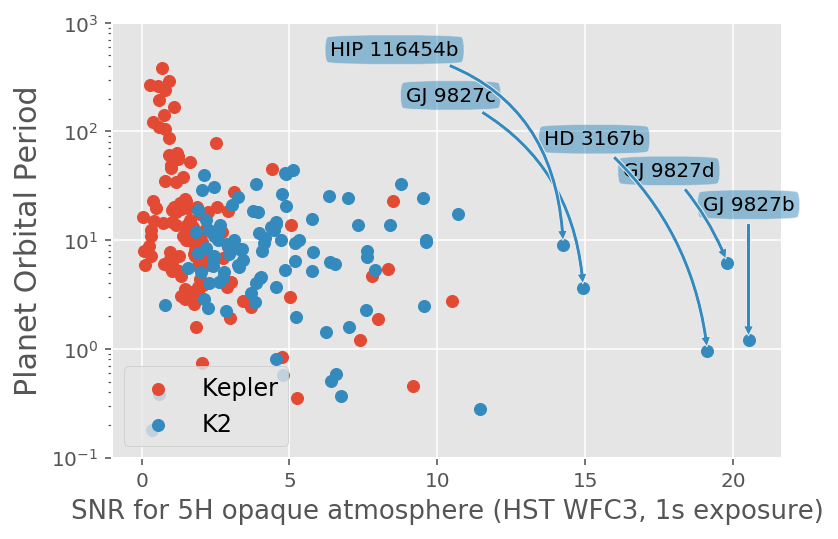

In [355]:
fig, ax = plt.subplots()
ok = (np.asarray(kepler.pl_radj)*u.jupiterRad).to(u.earthRad) < small
plt.scatter((kepler[ok].snr),kepler[ok].pl_orbper, label='Kepler')

ok = (np.asarray(k2.pl_radj)*u.jupiterRad).to(u.earthRad) < small
plt.scatter((k2[ok].snr),k2[ok].pl_orbper, label='K2')
        
plt.ylabel('Planet Orbital Period', fontsize=15)
plt.ylim(1e-1, 1e3)
plt.xlabel('SNR for 5H opaque atmosphere (HST WFC3, 1s exposure)', fontsize=13)
plt.yscale('log')
plt.legend(fontsize=12, loc='lower left')

#Annotations
i=0
df1 = k2[ok].sort_values('snr', ascending=False)
for i, n, l, x, y  in zip(range(len(df)), df1.pl_hostname, df1.pl_letter, df1.snr, df1.pl_orbper):
    ann = ax.annotate("{}{}".format(n, l),
                      xy=(x, y), xycoords='data',
                      xytext=(x*(1-(i*0.1)), y+(10+(np.exp(i)*10))), textcoords='data',
                      size=10, va="center", ha="center",
                      bbox=dict(boxstyle="round4", fc="C1", alpha=0.5),
                      arrowprops=dict(arrowstyle="simple",
                                      connectionstyle="arc3, rad=-{}".format(0.1*i),
                                      fc="C1"), 
                      )
    i+=1
    if i>=5:
        break


In [356]:
both =kepler.append(k2).reset_index(drop=True)
ok = (np.asarray(both.pl_radj)*u.jupiterRad).to(u.earthRad) < small
top = both[ok][['pl_hostname','pl_letter', 'st_h','pl_eqt','pl_radj','pl_bmassj','pl_orbper','delta','snr','pl_facility','pl_disc']].sort_values('snr', ascending=False)[0:20].reset_index(drop=True)

/Users/ch/miniconda3/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [357]:
top

,pl_hostname,pl_letter,st_h,pl_eqt,pl_radj,pl_bmassj,pl_orbper,delta,snr,pl_facility,pl_disc
0,GJ 9827,b,7.379,1172.0,0.145,0.012406,1.208980,0.000206,20.524550,K2,2017
1,GJ 9827,d,7.379,680.0,0.185,0.015561,6.201467,0.000191,19.810535,K2,2017
2,HD 3167,b,7.203,1860.0,0.152,0.015790,0.959641,0.000152,19.134379,K2,2016
3,GJ 9827,c,7.379,811.0,0.113,0.007610,3.648083,0.000109,14.930328,K2,2017
4,HIP 116454,b,8.140,690.0,0.220,0.018282,9.120500,0.000200,14.256491,K2,2014
5,K2-141,b,8.524,2039.0,0.135,0.015980,0.280324,0.000184,11.452879,K2,2018
6,K2-136,c,8.496,425.0,0.260,0.027700,17.307137,0.000156,10.683268,K2,2017
7,Kepler-21,b,7.031,2025.0,0.146,0.012486,2.785780,0.000039,10.511668,Kepler,2012
8,K2-3,b,8.805,463.0,0.194,0.016264,10.054490,0.000168,9.629656,K2,2015
9,HD 106315,b,7.962,1046.0,0.207,0.018900,9.558040,0.000077,9.628761,K2,2017


In [358]:
ok = ((np.asarray(df.pl_radj)*u.jupiterRad).to(u.earthRad) < small) & (df.pl_tranflag==1)
top = df[ok][['pl_hostname','pl_letter', 'st_h','pl_eqt','pl_radj','pl_bmassj','pl_orbper','delta','snr','pl_facility','pl_disc']].sort_values('snr', ascending=False)[0:20].reset_index(drop=True)

/Users/ch/miniconda3/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [343]:
top.loc[0, 'pl_bmassj']*u.jupiterMass.to(u.earthMass)

4.738821542326601